In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
iris = sns.load_dataset('iris')
iris.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
85,6.0,3.4,4.5,1.6,versicolor
54,6.5,2.8,4.6,1.5,versicolor
147,6.5,3.0,5.2,2.0,virginica
127,6.1,3.0,4.9,1.8,virginica
122,7.7,2.8,6.7,2.0,virginica


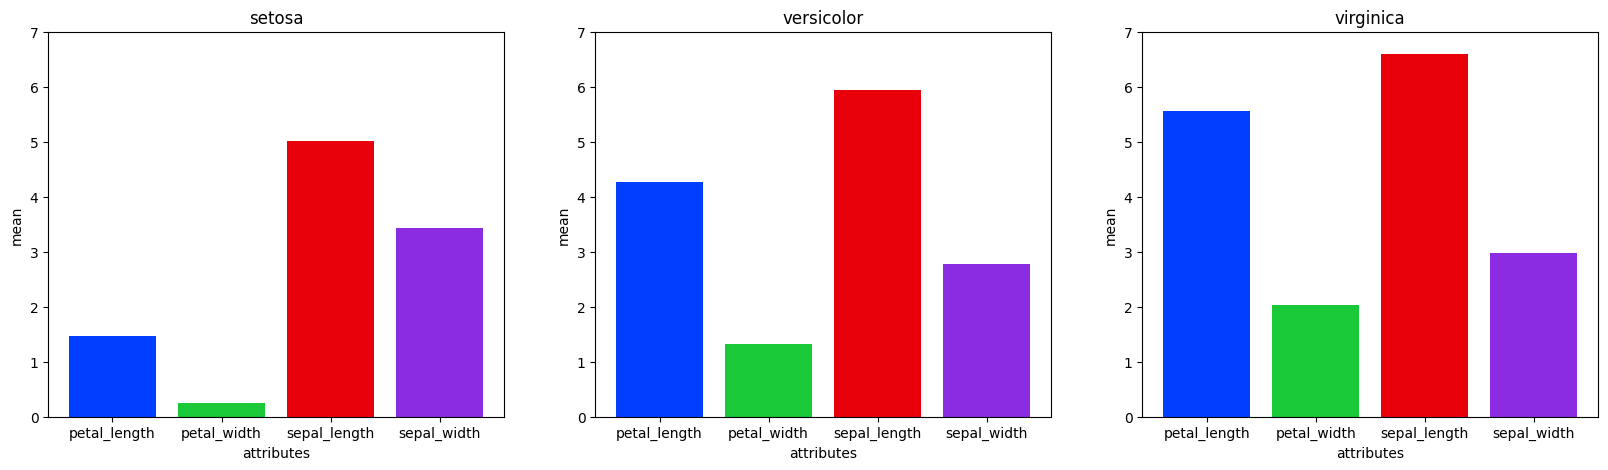

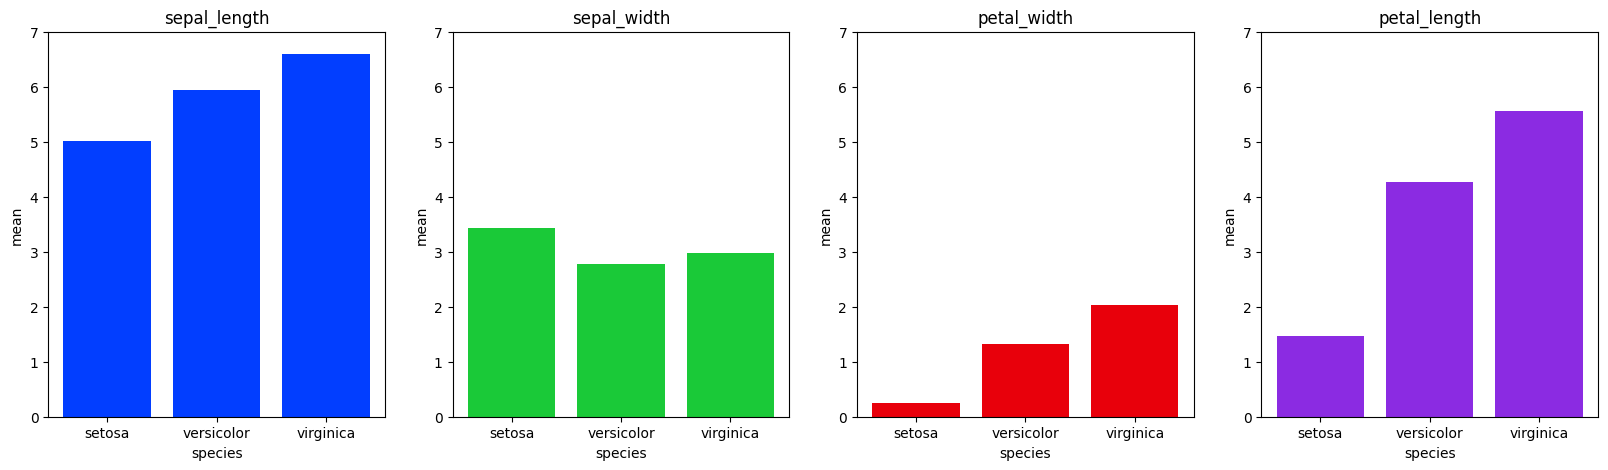

In [51]:
number_of_species = iris.species.unique().shape[0]
fig, axs = plt.subplots(ncols=number_of_species,   figsize=(20, 5))
melted_iris = iris.melt(id_vars='species', value_vars=['sepal_length', 'sepal_width', 'petal_width', 'petal_length'])
colors = sns.color_palette('bright6', melted_iris.variable.unique().shape[0])
for (i,s), ax in zip(enumerate(iris.species.unique()), axs):
    df_tmp = melted_iris[melted_iris.species == s].groupby('variable').value.mean()
    ax.bar(x=df_tmp.index, height=df_tmp, color=(np.array(colors)))
    ax.set_title(f'{s}')
    ax.set_ylabel('mean')
    ax.set_xlabel('attributes')
    ax.set_ylim(0, 7)
plt.show()


number_of_fields = iris.columns.shape[0]-1
fig, axs = plt.subplots(ncols=number_of_fields,   figsize=(20, 5))
melted_iris = iris.melt(id_vars='species', value_vars=['sepal_length', 'sepal_width', 'petal_width', 'petal_length'])
colors = sns.color_palette('bright6', melted_iris.variable.unique().shape[0])
for (i,f), ax in zip(enumerate(melted_iris.variable.unique()), axs):
    df_tmp = melted_iris[melted_iris.variable == f].groupby('species').value.mean()
    ax.bar(x=df_tmp.index, height=df_tmp, color=colors[i])
    ax.set_title(f'{f}')
    ax.set_ylabel('mean')
    ax.set_xlabel('species')
    ax.set_ylim(0, 7)
plt.show()



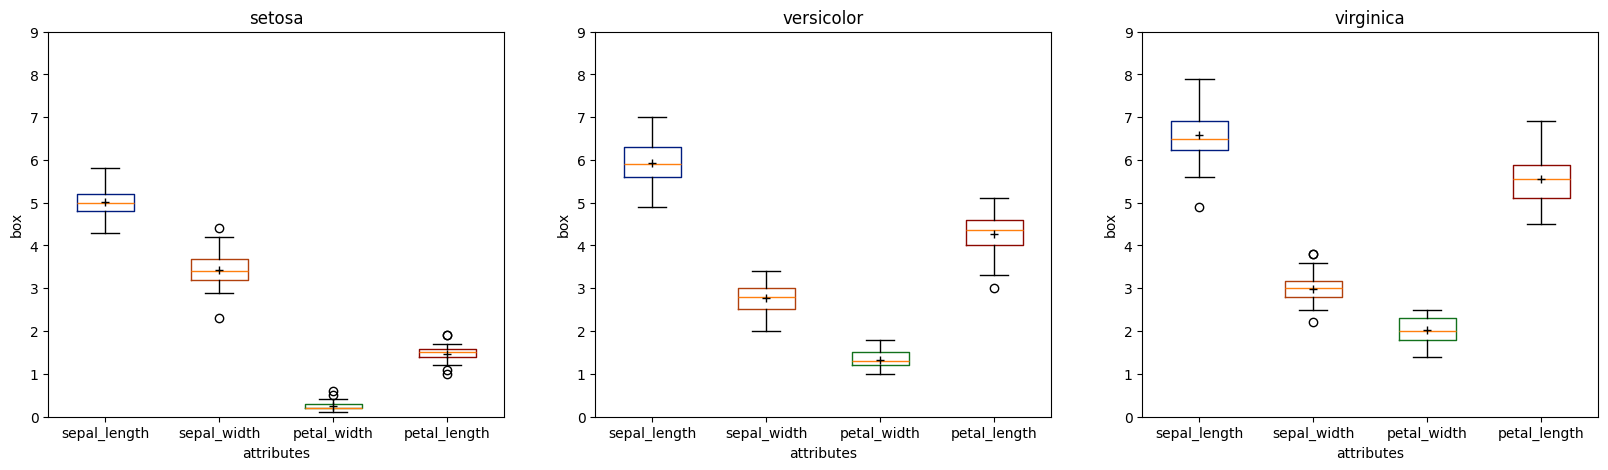

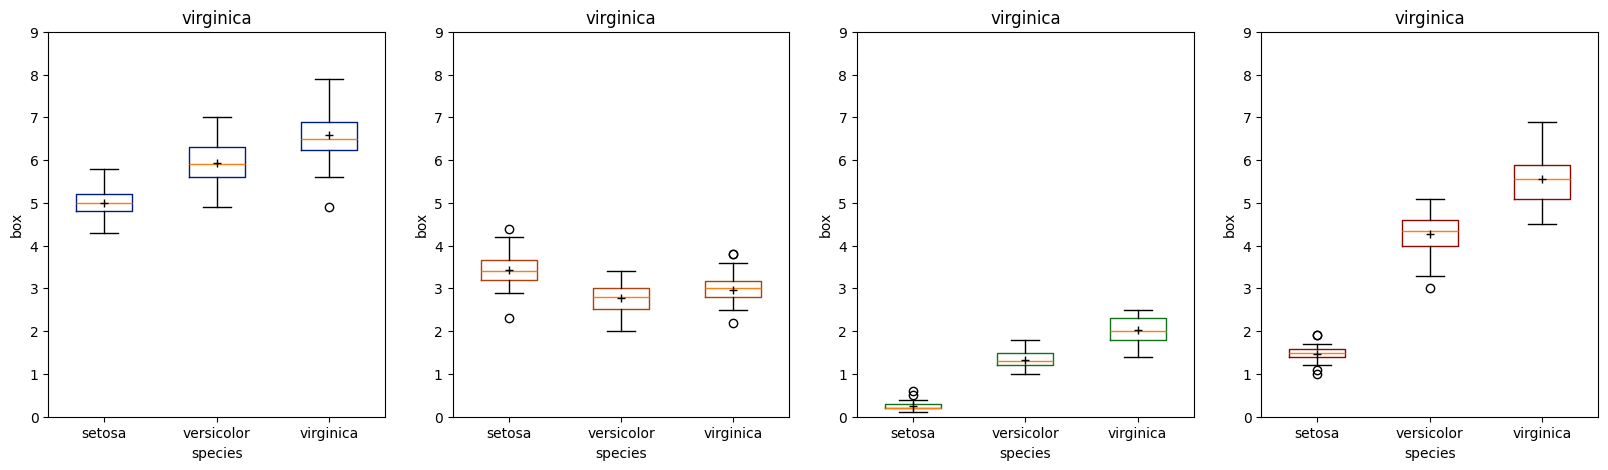

In [126]:
number_of_species = iris.species.unique().shape[0]
fig, axs = plt.subplots(ncols=number_of_species,   figsize=(20, 5))
melted_iris = iris.melt(id_vars='species', value_vars=['sepal_length', 'sepal_width', 'petal_width', 'petal_length'])
colors = sns.color_palette('dark', melted_iris.variable.unique().shape[0])
variables = melted_iris.variable.unique()
width = 0.5
for (i,s), ax in zip(enumerate(iris.species.unique()), axs):
    df_tmp = iris[iris.species==s].drop('species', axis=1)

    for j, v in enumerate(variables):
        bprops = dict(color=np.array(colors[j]))
        mprops=dict(marker='+', markerfacecolor='black', markeredgecolor='black')
        ax.boxplot(df_tmp[v], widths=width ,boxprops=bprops, showfliers=True, showmeans=True, meanprops=mprops, positions=[j])
        ax.set_xticks(list(range(0, len(variables))), variables)
    
    ax.set_title(f'{s}')
    ax.set_ylabel('box')
    ax.set_xlabel('attributes')
    ax.set_ylim(0, 9)
plt.show()



number_of_species = iris.species.unique().shape[0]
melted_iris = iris.melt(id_vars='species', value_vars=['sepal_length', 'sepal_width', 'petal_width', 'petal_length'])

colors = sns.color_palette('dark', melted_iris.variable.unique().shape[0])
variables = melted_iris.variable.unique()
fig, axs = plt.subplots(ncols=variables.shape[0],   figsize=(20, 5))
width = 0.5
for (i,v), ax in zip(enumerate(variables), axs):

    for j, s in enumerate(iris.species.unique()):
        df_tmp = melted_iris[(melted_iris.variable == v) & (melted_iris.species == s)].value
        bprops = dict(color=np.array(colors[i]))
        mprops=dict(marker='+', markerfacecolor='black', markeredgecolor='black')

        ax.boxplot(df_tmp, widths=width ,boxprops=bprops, showfliers=True, showmeans=True, meanprops=mprops, positions=[j])
        ax.set_xticks(list(range(number_of_species)), iris.species.unique())
    
    ax.set_title(f'{s}')
    ax.set_ylabel('box')
    ax.set_xlabel('species')
    ax.set_ylim(0, 9)

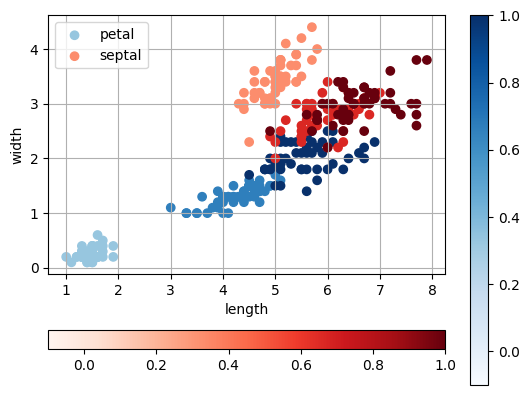

In [159]:
from matplotlib import colormaps
species_count = iris.species.unique().shape[0]
mapper = {i: (j+1)/species_count for j, i in enumerate(iris.species.unique())}
rowc = iris.species.map(mapper)
a1 = plt.scatter(x=iris.petal_length, y=iris.petal_width, c=rowc, cmap='Blues', vmin=-0.1, label='petal')
a2 = plt.scatter(x=iris.sepal_length, y=iris.sepal_width, c=rowc, cmap='Reds', vmin=-0.1, label='septal')
plt.colorbar(a1, orientation='vertical')
plt.colorbar(a2, orientation='horizontal')
plt.legend()
plt.xlabel('length')
plt.ylabel('width')
plt.grid()